In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

adventure = pd.read_csv("Data/CleanedDataAdventure.csv")
adventure

,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Average,2600,3DS,...,PS4,PSP,PSV,SAT,SNES,Wii,WiiU,X,X360,XOne
0,1992,4,6.16,2.04,2.69,0.29,11.18,4.472,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,4,3.28,1.64,0.07,0.56,5.54,2.218,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2007,4,1.91,2.00,0.09,0.82,4.82,1.928,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1987,4,2.19,0.50,1.61,0.08,4.38,1.752,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1998,4,1.63,1.53,0.00,0.18,3.34,1.336,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2011,4,1.28,1.29,0.12,0.50,3.18,1.274,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2008,4,1.87,0.97,0.00,0.30,3.14,1.256,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2010,4,1.29,1.21,0.06,0.47,3.03,1.212,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1994,4,0.02,2.79,0.00,0.00,2.81,1.124,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2011,4,1.53,0.92,0.02,0.24,2.70,1.082,0,0,...,0,0,0,0,0,0,0,0,1,0


In [2]:
#calculate average sales for action genre from 1997 to 2011
data = {'Year': [],
        'Average Sales': []}
sales = pd.DataFrame(data)
year = 1997
for i in range(15):
    x = adventure[adventure['Year_of_Release'] == year]
    avg = x['Average'].mean()
    globalsales = x['Global_Sales'].mean()
    
    data = {'Year': year,
            'Average Sales': avg,
            'Global Sales': globalsales}
    sales = sales.append(data, ignore_index=True)
    year += 1

sales['Year'] = sales['Year'].astype(int) 
sales

,Year,Average Sales,Global Sales
0,1997,NaN,NaN
1,1998,1.336,3.34
2,1999,NaN,NaN
3,2000,NaN,NaN
4,2001,NaN,NaN
5,2002,NaN,NaN
6,2003,NaN,NaN
7,2004,NaN,NaN
8,2005,NaN,NaN
9,2006,NaN,NaN


In [3]:
#replace NaN values with average
gblAvg = sales['Global Sales'].mean()
Avg = sales['Average Sales'].mean()
sales['Global Sales'] = sales['Global Sales'].replace(np.nan, gblAvg)
sales['Average Sales'] = sales['Average Sales'].replace(np.nan, Avg)
sales.head()

,Year,Average Sales,Global Sales
0,1997,1.411,3.526
1,1998,1.336,3.340
2,1999,1.411,3.526
3,2000,1.411,3.526
4,2001,1.411,3.526


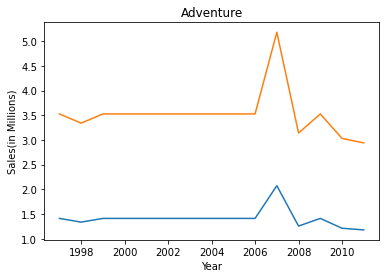

In [4]:
#sales plot
plt.plot(sales['Year'], sales['Average Sales'], sales['Year'], sales['Global Sales'])
plt.title('Adventure')
plt.xlabel('Year')
plt.ylabel('Sales(in Millions)')
plt.show()

In [5]:
#for SVR algorithm
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

y = adventure['Average'] #output
ygl = adventure['Global_Sales']
X = np.array(adventure['Year_of_Release']).reshape(-1,1) #input

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
Xgl_train, Xgl_test, ygl_train, ygl_test = train_test_split(X, y, test_size=0.2)

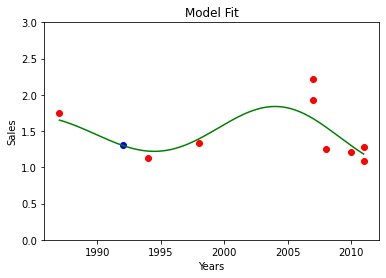

In [6]:
model = SVR(kernel='rbf')
modelgl = SVR(kernel='rbf')

model.fit(X_train, y_train)
modelgl.fit(Xgl_train, ygl_train)
prediction = model.predict(X_test)
predictiongl = modelgl.predict(Xgl_test)
# model.score(X_test, y_test)

# prediction

X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

# plt.scatter(X_test, prediction)
plt.ylim(top=3)
plt.title('Model Fit')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.scatter(X_train, y_train, color='red')
plt.plot(X_grid, model.predict(X_grid), color='green')
plt.scatter(X_test, prediction, color='blue')
plt.show()  #why you do dis???

In [8]:
import joblib

filename = 'savedModels/adventure.joblib'
joblib.dump(model, filename)

['adventure.joblib']

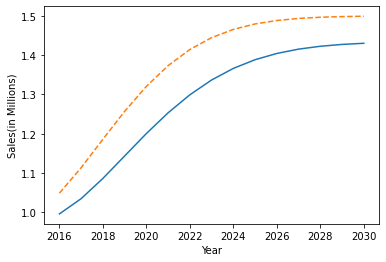

In [8]:
year = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]
data = {'Prediction_Year': [],
        'Predicted_Sales': [],
        'Global': []}
future_sales = pd.DataFrame(data)
future_sales['Prediction_Year'] = future_sales['Prediction_Year'].astype(int)

for i in range(15):
    x = model.predict([[year[i]]])
    xgl = modelgl.predict([[year[i]]])
    data = {'Prediction_Year': year[i],
            'Predicted_Sales': x,
            'Global': xgl}
    future_sales = future_sales.append(data, ignore_index=True)

plt.plot(future_sales['Prediction_Year'], future_sales['Predicted_Sales'])
plt.plot(future_sales['Prediction_Year'], future_sales['Global'], ls = '--')
plt.xlabel('Year')
plt.ylabel('Sales(in Millions)')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import statistics

print(mean_squared_error(y_test, prediction))
test_rmse = sqrt(mean_squared_error(y_test, prediction))
print(test_rmse/statistics.mean(y_test))

In [ ]:
print(test_rmse)

In [ ]:
#for XGBoost algorithm
# from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression

# xgb_classifier = XGBClassifier()
# xgb_classifier.fit(X_train, y_train)
# prediction_xgb = xgb_classifier.predict(X_test)

line = LinearRegression()
linegbl = LinearRegression()
line.fit(X_train, y_train)
linegbl.fit(Xgl_train, ygl_train)
prediction_lin = line.predict(X_test)


plt.scatter(X_train, y_train, color='red')
plt.scatter(X_test, prediction_lin, color='blue')
plt.show()
line.predict([[2005]])

In [ ]:
rmse_lin = mean_squared_error(y_test, prediction_lin)
print(rmse_lin)

In [ ]:
year = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]
data = {'Prediction_Year': [],
        'Predicted_Sales': [],
        'Global Sales': []}
future_sales_lin = pd.DataFrame(data)
future_sales_lin['Prediction_Year'] = future_sales_lin['Prediction_Year'].astype(int)

for i in range(15):
    lin = line.predict([[year[i]]])
    lingbl = linegbl.predict([[year[i]]])
    data = {'Prediction_Year': year[i],
            'Predicted_Sales': lin,
            'Global Sales': lingbl}
    future_sales_lin = future_sales_lin.append(data, ignore_index=True)

plt.plot(future_sales_lin['Prediction_Year'], future_sales_lin['Predicted_Sales'], future_sales_lin['Prediction_Year'], future_sales_lin['Global Sales'])
plt.xlabel('Year')
plt.ylabel('Sales(in Millions)')
plt.show()
future_sales_lin

In [ ]:
print(modelgl.predict([[2031]]))
print(linegbl.predict([[2056]]))

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [ ]:
from mlxtend.plotting import plot_learning_curves

#change C and epsilon values
#over, under and best fit

clf = SVR(kernel='rbf')
# clf2 = LinearRegression()

plot_learning_curves(X_train, y_train, X_test, y_test, clf, scoring='mean_squared_error')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

gsc = GridSearchCV(
        estimator=SVR(kernel='rbf'),
        param_grid={
            'C': [0.1, 1, 100, 1000],
            'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
        })
grid_result = gsc.fit(X_train, y_train)
best_params = grid_result.best_params_
best_params